# Homework 2: Exploring & Visualizing Data

Make sure you have seaborn and missingno installed. Run `pip3 install seaborn` and `pip3 install missingno` in your container/shell if you don't.

## Setup

In this homework, we will more rigorously explore data visualization and data manipulation with a couple datasets. Please fill in the cells with `## YOUR CODE HERE` following the appropriate directions.

In [1]:
# removes the need to call plt.show() every time
%matplotlib inline

Seaborn is a powerful data visualization library built on top of matplotlib. We will be using seaborn for this homework (since it is a better tool and you should know it well). Plus seaborn comes default with *much* better aesthetics (invoked with the `set()` function call).

In [2]:
import missingno as msno
import seaborn as sns
sns.set()

Import `numpy` and `pandas` (remember to abbreviate them accordingly!)

In [3]:
import numpy as np
import pandas as pd

## Getting to know a new dataset

First load the `titanic` dataset directly from seaborn. The `load_dataset` function will return a pandas dataframe.

In [4]:
titanic = sns.load_dataset('titanic')

Now use some pandas functions to get a quick overview/statistics on the dataset. Take a quick glance at the overview you create.

In [5]:
titanic.sort_values('age', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
titanic.shape

(891, 15)

With your created overview, you should be able to answer these questions:

* What was the age of the oldest person on board? ## 80 years old
* What was the survival rate of people on board? ## 342/891
* What was the average fare of people on board? ## 32.2

By the way, for getting overviews, pandas also has a `groupby` function that is quite nice to use. example:

In [7]:
titanic.groupby(['sex','embark_town'])['survived'].mean()

sex     embark_town
female  Cherbourg      0.876712
        Queenstown     0.750000
        Southampton    0.689655
male    Cherbourg      0.305263
        Queenstown     0.073171
        Southampton    0.174603
Name: survived, dtype: float64

Now we have an overview of our dataset. The next thing we should do is clean it - check for missing values and deal with them appropriately.

`missingno` allows us to really easily see where missing values are in our dataset. It's a simple command:

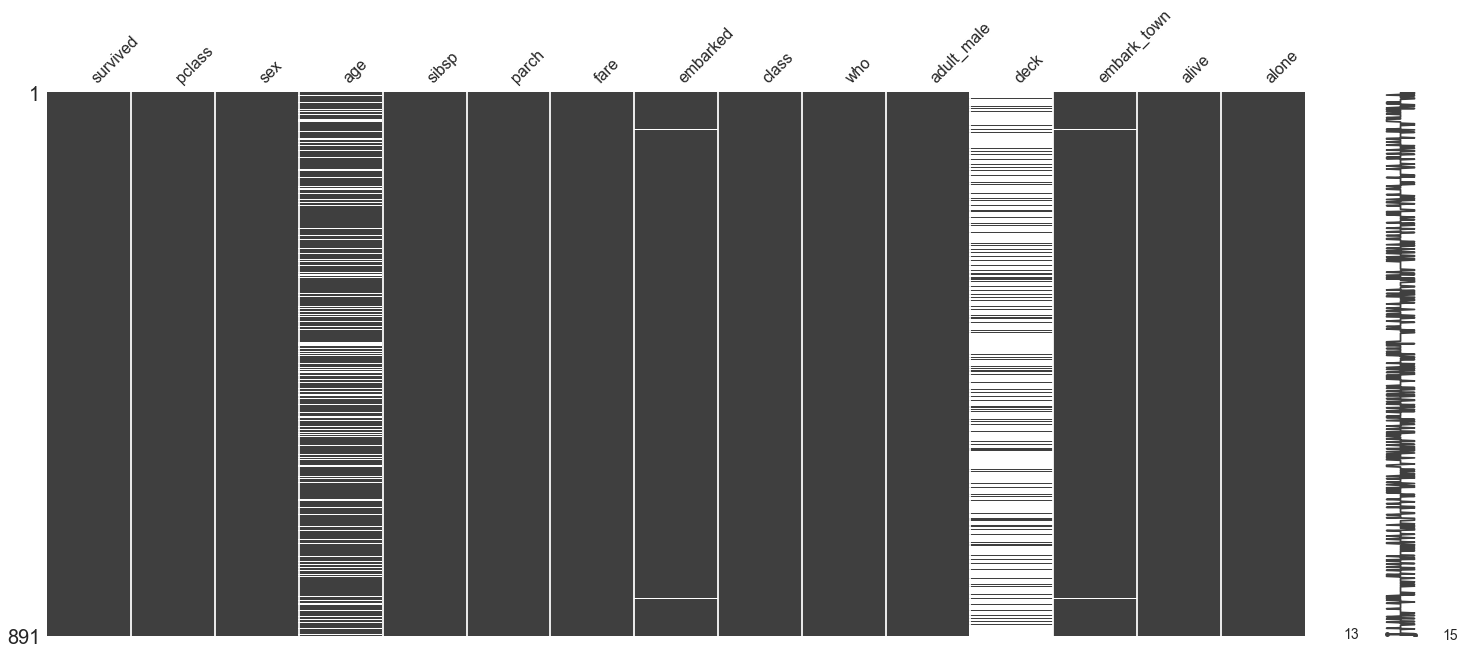

In [8]:
msno.matrix(titanic)

The white lines show us the missing data. One quick observation is the `deck` has a lot of missing data. Let's just go ahead and drop that column from the dataset since it's not relevant.

In [9]:
titanic.drop('deck', axis=1, inplace=True)

Now let's rerun the matrix and see. All that white is gone! Nice.

We still have a bunch of missing values for the age field. We can't just drop the age column since it is a pretty important datapoint. One way to deal with this is simply to just remove the records with missing information with `dropna()`, but this would end up removing out a significant amount of our data. 

What do we do now? We can now explore a technique called `missing value imputation`. What this means is basically we find a reasonable way to *replace* the unknown data with workable values. 

There's a lot of theory regarding how to do this properly, ([for the curious look here](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)). We can simply put in the average age value for the missing ages. But this really isn't so great, and would skew our stats.

If we assume that the data is missing *at random* (which actually is rarely the case and very hard to prove), we can just fit a model to predict the missing value based on the other available factors. One popular way to do this is to use KNN (where you look at the nearest datapoints to a certain point to conclude the missing value), but we can also use deep neural networks to achieve this task.  

You must now make you own decision on how to deal with the missing data. You may choose any of the methods discussed above. Easiest would be to fill in with average value (but this will skew our visualizations) (if you use pandas correctly, you can do this in one line - try looking at pandas documentation!). After writing your code, verify the result by rerunning the matrix.

In [10]:
titanic
titanic['age'].fillna(titanic["age"].mean(), inplace = True)

## Intro to Seaborn

There are 2 types of data in any dataset: categorial and numerical data. We will first explore categorical data.

One really easy way to show categorical data is through bar plots. Let's explore how to make some in seaborn.
We want to investigate the difference in rates at which males vs females survived the accident. Using the [documentation here](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [example here](http://seaborn.pydata.org/examples/color_palettes.html), create a `barplot` to depict this. It should be a really simple one-liner.

We will show you how to do this so you can get an idea of how to use the API.

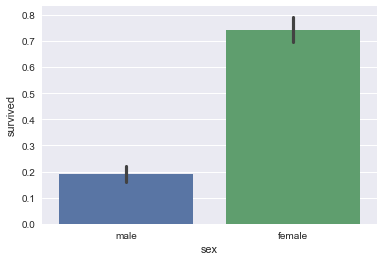

In [11]:
sns.barplot(x='sex', y='survived', data=titanic)

Notice how it was so easy to create the plot! You simply passed in the entire dataset, and just specified the `x` and `y` fields that you wanted exposed for the barplot. Behind the scenes seaborn ignored `NaN` values for you and automatically calculated the survival rate to plot. Also, that black tick is a 95% confidence interval that seaborn plots.

So we see that females were much more likely to make it out alive. What other factors do you think could have an impact on surival rate? Plot a couple more barplots below. Make sure to use *categorical* values, not something numerical like age or fare.

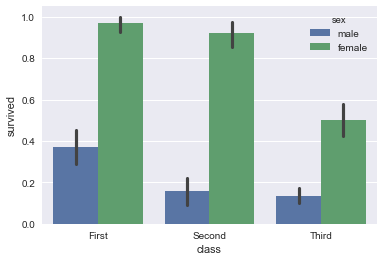

In [12]:
sns.barplot(x='class', y='survived', hue='sex',data=titanic)

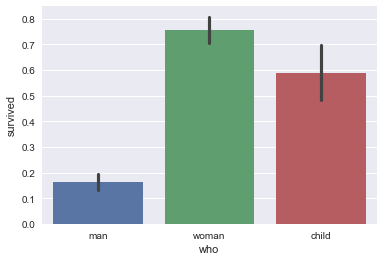

In [13]:
sns.barplot(x='who',y='survived',data=titanic)

What if we wanted to add a further sex breakdown for the categories chosen above? Go back and add a `hue='sex'` parameter for the couple plots you just created, and seaborn will split each bar into a male/female comparison.

Now we want to compare the embarking town vs the age of the individuals. We don't simply want to use a barplot, since that will just give the average age; rather, we would like more insight into the relative and numeric *distribution* of ages.

A good tool to help us here is [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Use this function to view `embark_town` vs `age`, again using `sex` as the `hue`.

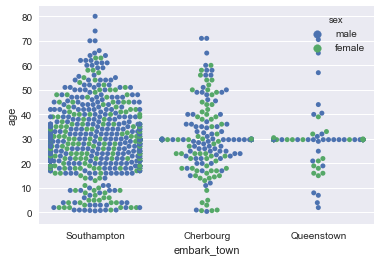

In [14]:
sns.swarmplot(x='embark_town',y='age',hue='sex',data=titanic)

Cool! This gives us much more information. What if we didn't care about the number of individuals in each category at all, but rather just wanted to see the *distribution* in each category? [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plots a density distribution. Plot that. Keep the `hue`.

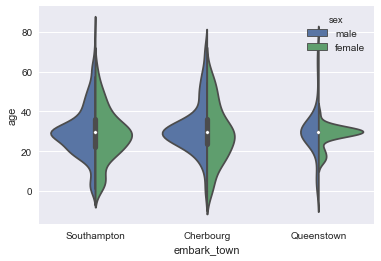

In [15]:
sns.violinplot(x='embark_town',y='age', hue='sex',split='True',data=titanic)

Go back and clean up the violinplot by adding `split='True'` parameter. 

Now take a few seconds to look at the graphs you've created of this data. What are some observations? Jot a couple down here.

Queenstown had a fairly even distribution of ages.
Southhampton has a very even male and female distribution. 

As I mentioned, data is categorical or numeric. We already started getting into numerical data with the swarmplot and violinplot. We will now explore a couple more examples.

Let's look at the distribution of ages. Use [`displot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to make a histogram of just the ages.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


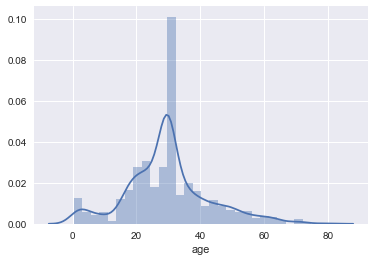

In [16]:
sns.distplot(titanic['age'])

If you did your missing value imputation by average value, your results will look very skewed. This is why we don't normally just fill in an average. As a quick fix for now, though, you can filter out the age values that equal the mean before passing it in to `displot`. Do this.

A histogram can nicely represent numerical data by breaking up numerical ranges into chunks so that it is easier to visualize. As you might notice from above, seaborn also automatically plots a gaussian kernel density estimate.

Do the same thing for fares - do you notice something odd about that histogram? What does that skew mean?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


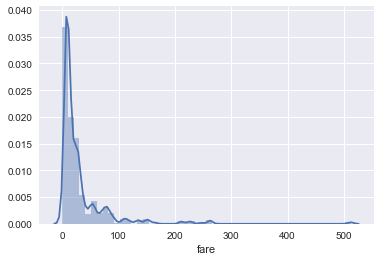

In [17]:
sns.distplot(titanic['fare'])

Now, using the [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function, make a scatterplot of the `age` and `fare` variables to see if there is any relationship between the two.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


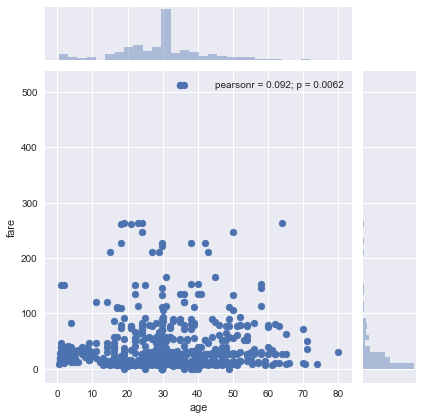

In [18]:
sns.jointplot(x='age',y='fare',data=titanic)

Scatterplots allow one to easily see trends/coorelations in data. As you can see here, there seems to be very little correlation. Also observe that seaborn automatically plots histograms.

Now, use a seaborn function we haven't used yet to plot something. The [API](http://seaborn.pydata.org/api.html) has a list of all the methods.

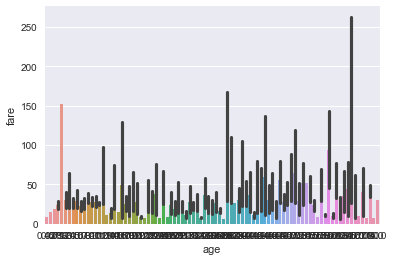

In [26]:
sns.barplot(x='age',y='fare',data=titanic)

# Reading

You are going to read this blog post: http://colah.github.io/posts/2015-09-Visual-Information/ and then answer the 5 questions below - one paragraph response for each question. We suggest you read & discuss with your peers in order to get the most out of the article.

#### Question 1: What is a conditional probability, what is a marginal probability, and what's the difference between them (in words)? What's the difference between them notationally? How can you express one as a sum of another? How does independence influence the relationship between conditional and marginal probabilities?
Answer: Conditional probability is the probability of doing something given something else. Marginal probability is simply the probability of doing something. Notationally, conditional is p(x,y) = p(x) * p(y|x). P(A|B) = P(A and B)/P(B). Both probabilities are independent in that they are not reflective of decisions before them. 

#### Question 2: Simpson's paradox. In your own words, explain why Treatment A is the better drug even though Treatment B initially looks better on paper. What can we do when assigning treatments to patients to prevent this from happening?
Answer: Treatment A was truly the better drug because it had a larger survival rate when the set was properly randomized. Randomize!

#### Question 3: Derive entropy - start with cost of encoding a message of length L, now use it to find the length of encoding a message with a certain cost. Then take its expectation.
Answer: 

#### Question 4: We can think of entropy as the "surprise" in seeing data similar to the one you encoded for. We can think of cross entropy as the "surprise" in seeing data from a different distribution than the one you encoded for. Why does cross entropy matter? Ie, what situation would force a calculation of cross entropy vs entropy? Why isn't cross entropy symmetric?
Answer: Cross entropy gives us a way to express how different two probability distributions are. Thr more different the distributions of p and q are, the more the cross entropy of p with respect to q will be bigger than the entropy of p. 

#### Question 5: Read through the section about KL divergence. In your own words, explain how we can utilize the tools of both entropy and cross entropy to come up a definition of "distance" which we call KL divergence. Now you know how t-SNE works: t-SNE helps create a low-dimensional representation of the original data, which can then be easily visualized. It uses KL divergence to ensure that this low-dimensional representation is as close to the original representation as possible.
Answer: KL divergence can tell us the difference between two distributions. For instance, if we want a predicted distrubiton to be close to the ground truth, KL lets us do that. 

Information theory is super exciting, and if you liked this read, I strongly suggest you take EECS 126! You can also come talk to me (Rohan) if you have any questions :) 